In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt



In [2]:
X, y = make_classification(n_samples=50, n_features=1, n_informative=1, n_clusters_per_class=1, n_redundant=0, random_state=42)

display(X, y)

array([[ 0.6369776 ],
       [-0.59619234],
       [-2.09376625],
       [ 0.93010288],
       [-2.05255794],
       [-1.38964034],
       [ 1.49714118],
       [-0.18441279],
       [-0.3479011 ],
       [-1.04849548],
       [ 1.11898174],
       [ 0.82370206],
       [ 0.37402517],
       [ 0.63633216],
       [ 0.10639024],
       [-0.06557082],
       [-1.22567721],
       [ 1.63891829],
       [-0.83184239],
       [ 1.06704094],
       [ 1.10357395],
       [-0.90070528],
       [-2.13411413],
       [-0.66553546],
       [ 1.20768082],
       [ 2.11950575],
       [-0.27263376],
       [ 0.01424809],
       [ 0.26212947],
       [ 0.3607259 ],
       [-0.8378584 ],
       [ 1.1262359 ],
       [ 0.23875242],
       [ 0.02318512],
       [ 0.56493051],
       [-0.66284624],
       [ 0.81801474],
       [-1.55113444],
       [-0.83185418],
       [ 0.72159271],
       [-1.46513853],
       [ 1.44632474],
       [-1.17376558],
       [ 0.30434643],
       [-1.35671604],
       [ 0

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0])

In [3]:
X = np.squeeze(X)

In [4]:
df = pd.DataFrame({'x': X, 'y':y})
df.head()

,x,y
0,0.636978,1
1,-0.596192,0
2,-2.093766,0
3,0.930103,1
4,-2.052558,0


(-0.5, 1.5)

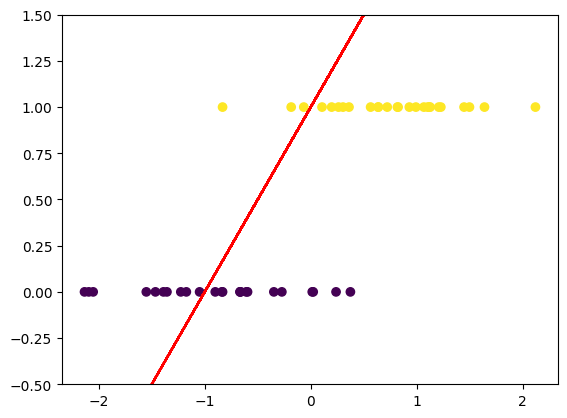

In [5]:
a = 1
b = 1


plt.scatter(df['x'], df['y'], c=df['y'])
plt.plot(df['x'], a * df['x'] + b, c='r')
plt.ylim(-0.5, 1.5)


In [6]:
df['pred'] = a * df['x'] + b
df['er'] = df['y'] - df['pred']

In [7]:
n_iter = 100
nu = 0.1

for i in range(n_iter):
    
    df['er'] = df['y'] - df['pred']
    
    df['a_change'] = df['x'] * np.sign(df['er'])
    df['b_change'] = np.sign(df['er'])
    
    a += nu * df['a_change'].mean()
    b += nu * df['b_change'].mean()
    
    
    df['pred'] = a * df['x'] + b
    
    df['er'] = df['y'] - df['pred']
    df['abs_er'] = np.abs(df['er'])    
    
    
    if i % 10 == 0:
        print(df['abs_er'].mean())

0.6514294019675184
0.2546272678780301
0.24686093389834793
0.24688777166855289
0.24671365012997515
0.24687039404259084
0.24689723181279583
0.2467162338892916
0.24687985418683372
0.24690669195703877


In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

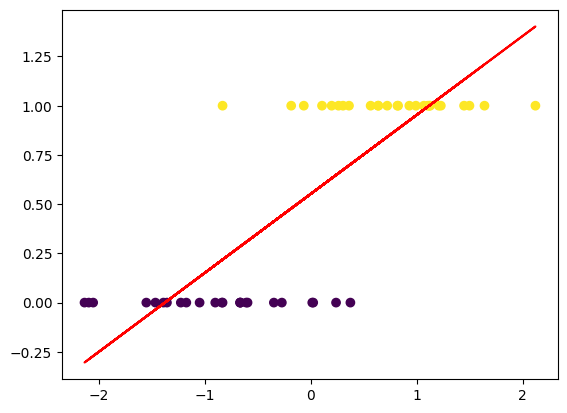

In [9]:
plt.scatter(df['x'], df['y'], c=y)
plt.plot(df['x'], a * df['x'] + b, c='r')

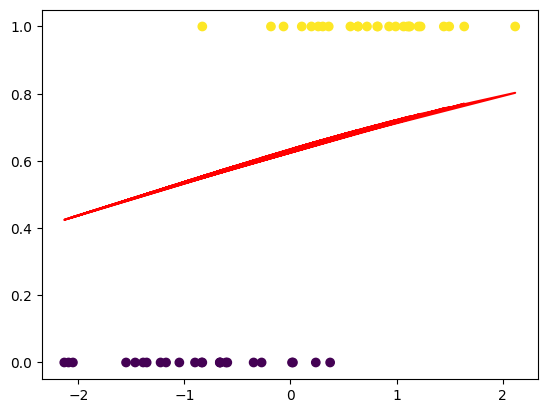

In [10]:
plt.scatter(df['x'], df['y'], c=y)
plt.plot(df['x'], sigmoid(a * df['x'] + b), c='r')

---------------

In [11]:
model = LogisticRegression()

model.fit(X.reshape(-1, 1), df['y'])

LogisticRegression()

In [12]:
y_pred_sk = model.predict(X.reshape(-1, 1))


In [13]:
print(metrics.accuracy_score(y, y_pred_sk))

0.86


In [14]:
proba = model.predict_proba(X.reshape(-1, 1))
proba

array([[0.16934643, 0.83065357],
       [0.77092508, 0.22907492],
       [0.99022898, 0.00977102],
       [0.09477024, 0.90522976],
       [0.98927952, 0.01072048],
       [0.95336171, 0.04663829],
       [0.02803175, 0.97196825],
       [0.56888309, 0.43111691],
       [0.65678787, 0.34321213],
       [0.90395175, 0.09604825],
       [0.06379381, 0.93620619],
       [0.11765628, 0.88234372],
       [0.27043788, 0.72956212],
       [0.16955296, 0.83044704],
       [0.40518868, 0.59481132],
       [0.50177236, 0.49822764],
       [0.9336883 , 0.0663117 ],
       [0.02046547, 0.97953453],
       [0.85186828, 0.14813172],
       [0.07122095, 0.92877905],
       [0.06591832, 0.93408168],
       [0.87055792, 0.12944208],
       [0.99107782, 0.00892218],
       [0.79757472, 0.20242528],
       [0.05275741, 0.94724259],
       [0.00695697, 0.99304303],
       [0.61724716, 0.38275284],
       [0.45651227, 0.54348773],
       [0.32344397, 0.67655603],
       [0.27644512, 0.72355488],
       [0.

In [15]:
a_0 = model.coef_[0]
b_1 = model.intercept_

print(a_0, b_1)

[2.27365939] [0.14199624]


In [16]:
pred_proba = model.predict_proba(X.reshape(-1, 1))

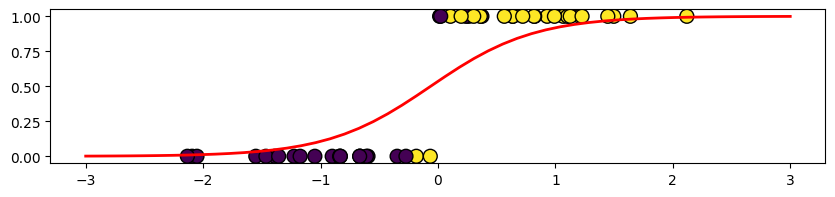

In [17]:
x = np.linspace(-3, 3, len(df['x']))

model_y_sk = a_0 * x + b_1

plt.figure(figsize=(10, 2))
plt.plot(x, sigmoid(model_y_sk), c='r', linewidth=2)
plt.scatter(X, y_pred_sk, c=y, s=100, edgecolors='black')



-------------

In [18]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import metrics
import matplotlib.pyplot as plt

In [19]:
x, y = make_classification(n_samples=50, n_features=1, n_clusters_per_class=1, n_informative=1, n_redundant=0, random_state=42)

In [20]:
model = LogisticRegression()
model.fit(x, y)


LogisticRegression()

In [21]:
y_pred = model.predict(x)
y_pred_proba = model.predict_proba(x)

In [22]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

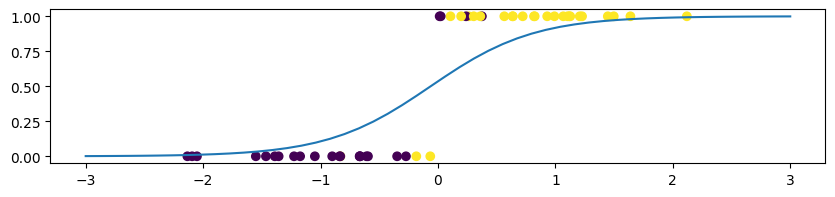

In [23]:
X = np.linspace(-3, 3, x.shape[0])

y_pred_X = model.coef_[0] * X + model.intercept_

plt.figure(figsize=(10, 2))
plt.plot(X, sigmoid(y_pred_X))
plt.scatter(x, y_pred, c=y)

In [100]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import metrics
import matplotlib.pyplot as plt


x, y = make_classification(n_samples=50, n_features=1, n_clusters_per_class=1, n_informative=1, n_redundant=0, random_state=42)

In [101]:
df = pd.DataFrame({'x': np.squeeze(x), 'y':y})

In [102]:
x = np.squeeze(x)

In [103]:

class Log_reg:
    
        
    def fit(self, x, y):
        
        self.x = x
        self.y = y
        
        self.coef_ = 1
        self.intercept = 1
        n_iter = 100
        nu = 0.1
        
        self.pred = self.coef_ * self.x + self.intercept
 
        for i in range(n_iter):
    
            err = self.y - self.pred
    
            a_change = self.x * np.sign(err)
            b_change = np.sign(err)
    
            self.coef_ += nu * a_change.mean()
            self.intercept += nu * b_change.mean()
            
            self.pred = self.coef_ * self.x + self.intercept
    
            err = self.y - self.pred
        
        self.abs_er = np.abs(err).mean()
        print(self.abs_er)    
       
        
        return print('LogReg fit')

    
    def predict(self, X):
        self.X = X 
        predict = self.coef_ * self.X + self.intercept
        return np.squeeze(np.where(predict >= 0.5, 1, 0))
    
    
    def pred_proba(self, X_proba):
        self.X_proba = self.coef_ * X_proba + self.intercept
        
        return np.array([1 - self.X_proba, self.X_proba])
    
    def score(self, X_score, y_score):
        self.X_score = X_score
        self.y_score = y_score
        
        pred_score = self.coef_ * self.X_score + self.intercept
        err = self.y_score - pred_score
        
        return np.abs(err).mean()
    


In [104]:
model_my = Log_reg()
model_my.fit(x, y)

0.24678196946347566
LogReg fit


In [105]:
y_pred = model_my.predict(x)
y_pred_proba = model_my.pred_proba(x)

In [106]:
print(y_pred)
print(y_pred_proba[1])
print(y_pred_proba[0])

[1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 1 1 0 1 0]
[ 0.80752604  0.31283512 -0.28792248  0.92511439 -0.2713916  -0.00545963
  1.15258401  0.47802209  0.41243812  0.13139196  1.00088388  0.88243129
  0.70204165  0.80726712  0.59467886  0.52569601  0.06031482  1.20945845
  0.21830319  0.98004763  0.99470299  0.19067857 -0.30410819  0.28501786
  1.03646586  1.40224798  0.44263191  0.55771568  0.65715426  0.6967066
  0.21588984  1.00379391  0.64777646  0.5613008   0.77862407  0.28609665
  0.8801498  -0.07024362  0.21829846  0.84146972 -0.03574602  1.1321988
  0.08113937  0.67408976  0.00774808  0.94988142  0.63112856  0.30767694
  1.04424375  0.28435178]
[ 1.92473956e-01  6.87164877e-01  1.28792248e+00  7.48856112e-02
  1.27139160e+00  1.00545963e+00 -1.52584010e-01  5.21977908e-01
  5.87561881e-01  8.68608044e-01 -8.83880919e-04  1.17568713e-01
  2.97958346e-01  1.92732879e-01  4.05321142e-01  4.74303991e-01
  9.39685183e-01 -2.09458451e

In [112]:
score = model_my.score(x, y)
print(score)

0.24678196946347566


In [116]:
model_sk = LogisticRegression()
model_sk.fit(x.reshape(-1, 1), y)

LogisticRegression()

In [118]:
y_pred_sk = model_sk.predict(x.reshape(-1, 1))
y_pred_proba_sk = model_sk.predict_proba(x.reshape(-1, 1))

print(y_pred_sk)
print(y_pred_proba_sk)

[1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 0 1 0 1 0 1 0 1 1 0 1 0]
[[0.16934643 0.83065357]
 [0.77092508 0.22907492]
 [0.99022898 0.00977102]
 [0.09477024 0.90522976]
 [0.98927952 0.01072048]
 [0.95336171 0.04663829]
 [0.02803175 0.97196825]
 [0.56888309 0.43111691]
 [0.65678787 0.34321213]
 [0.90395175 0.09604825]
 [0.06379381 0.93620619]
 [0.11765628 0.88234372]
 [0.27043788 0.72956212]
 [0.16955296 0.83044704]
 [0.40518868 0.59481132]
 [0.50177236 0.49822764]
 [0.9336883  0.0663117 ]
 [0.02046547 0.97953453]
 [0.85186828 0.14813172]
 [0.07122095 0.92877905]
 [0.06591832 0.93408168]
 [0.87055792 0.12944208]
 [0.99107782 0.00892218]
 [0.79757472 0.20242528]
 [0.05275741 0.94724259]
 [0.00695697 0.99304303]
 [0.61724716 0.38275284]
 [0.45651227 0.54348773]
 [0.32344397 0.67655603]
 [0.27644512 0.72355488]
 [0.85358604 0.14641396]
 [0.06281581 0.93718419]
 [0.33518239 0.66481761]
 [0.45147539 0.54852461]
 [0.19365151 0.80634849]
 [0.79658577 0.2034142

In [120]:
print(model_sk.score(x.reshape(-1, 1), y))

0.86


In [125]:
print(y_pred == y_pred_sk)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]


In [3]:
a = 0.1 * 0.5

print(a)

0.05


In [49]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [71]:
x, y = make_classification(n_samples=50, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [75]:
df = pd.DataFrame({'x': x, 'y':y})
df.head()

,x,y
0,0.636978,1
1,-0.596192,0
2,-2.093766,0
3,0.930103,1
4,-2.052558,0


In [76]:
model = LogisticRegression()
model.fit(df['x'].values.reshape(-1, 1), df['y'])

LogisticRegression()

In [77]:
y_pred_sk = model.predict(df['x'].values.reshape(-1, 1))

In [78]:
y_pred_sk

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0])

In [84]:
model_2 = Log_reg()
model_2.fit(x, y)


0.24678196946347566
LogReg fit


In [85]:
y_pred = model_2.predict(x)

In [86]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0])

In [89]:
error = (y_pred_sk == y_pred)
error

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [99]:
df['pred_my'] = y_pred
df['pred_sk'] = y_pred_sk 
df['pred_proba_my'] = y_pred_proba
df['pred_proba_sk'] = y_pred_proba_sk

NameError: name 'y_pred_proba' is not defined

----

In [67]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn import metrics

x, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                           n_redundant=0, n_informative=2, n_repeated=0, weights=[0.4, 0.6])

In [142]:
class LogisticRegressorTRAIN:
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __init__(self, n_iter=150, nu=0.05):
        self.n_iter = n_iter
        self.nu = nu
        self.a_coef = 1
        self.b_coef = 1
        self.score = 0
        
    def fit(self, x, y):
        
        predict = 1 / (1 + np.exp(-self.a_coef * x + self.b_coef))
        
        for i in range(self.n_iter):
            
            err = y.reshape(-1, 1) - predict
            
            a_change = x * np.sign(err)
            b_change = np.sign(err)
            
            self.a_coef += self.nu * a_change.mean()
            self.b_coef += self.nu * b_change.mean()
            
    def predict(self, x):
        return np.where((self.a_coef * x + self.b_coef)[::, 1] >= 0.5, 1, 0).reshape(-1)
    

In [143]:
model = LogisticRegressorTRAIN()
model.fit(x, y)

y_pred = model.predict(x)

In [144]:
print(metrics.mean_absolute_error(y, y_pred))

0.08


In [145]:
print(np.sum(y != y_pred))

8


In [146]:
print(y)

[1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1]


In [147]:
print(y_pred)

[1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1]


In [280]:
AA = 10.1
bb = -10.1

In [281]:
x0_0 = model.sigmoid(bb)
x0_0

4.107786776476334e-05

In [288]:
p = np.e**bb / (1 + np.e**bb)

In [289]:
p

4.1077867764763366e-05

In [1]:
class LogReg:

    def __init__(self, nu=0.01, n_iter=100):
        self.nu = nu
        self.n_iter = n_iter
        self.a = 1
        self.b = 1
        self.proba = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, x, y):

        predict = self.sigmoid(self.a * x + self.b)

        for _ in range(self.n_iter):

            err = y.reshape(-1, 1) - predict

            a_change = x * err
            b_change = err

            self.a += self.nu * a_change.mean()
            self.b += self.nu * b_change.mean()

            predict = self.sigmoid(self.a * x + self.b)

            self.proba = y.reshape(-1, 1) * (np.log(predict)) + (1 - y) * (np.log(1 - predict))

    def pred_proba(self):
        return self.proba

    def predict(self, x):
        return np.squeeze(np.where(self.sigmoid(self.a * x + self.b) >= 0.5, 1, 0)[::, 1])



In [2]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция стоимости (логистическая регрессия)
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Градиентный спуск
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Прогноз
        h = sigmoid(np.dot(X, weights))
        # Градиент
        gradient = np.dot(X.T, (h - y)) / m
        # Обновление весов
        weights -= learning_rate * gradient

        # Запоминаем значение функции стоимости на каждой итерации
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        # Вывод стоимости каждые 1000 итераций
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost {cost}")
    
    return weights, cost_history

# Основная функция для обучения модели
def logistic_regression(X, y, learning_rate=0.01, iterations=10000):
    # Добавляем столбец единиц для свободного члена (смещения)
    X = np.c_[np.ones(X.shape[0]), X]
    
    # Инициализация весов
    weights = np.zeros(X.shape[1])

    # Запуск градиентного спуска
    weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)
    
    return weights, cost_history

# Пример использования
np.random.seed(42)
n_samples = 1000
n_features = 10

# Генерация случайных данных
X = np.random.randn(n_samples, n_features)
y = np.random.randint(0, 2, n_samples)

# Обучение модели
weights, cost_history = logistic_regression(X, y)

# Вывод финальных весов
print(f"Final weights: {weights}")


Iteration 0: Cost 0.6931241470674823
Iteration 1000: Cost 0.6886769792506295
Iteration 2000: Cost 0.6886464538030534
Iteration 3000: Cost 0.6886461915827039
Iteration 4000: Cost 0.6886461889203136
Iteration 5000: Cost 0.6886461888894376
Iteration 6000: Cost 0.6886461888890428
Iteration 7000: Cost 0.6886461888890374
Iteration 8000: Cost 0.6886461888890374
Iteration 9000: Cost 0.6886461888890372
Final weights: [ 0.01066915 -0.01410726 -0.03612968 -0.04153483 -0.08571516  0.07153272
  0.03507027 -0.06637808  0.05687914 -0.05024032 -0.09220505]
